In [24]:
# import libraries possible needed
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import itertools
import time

In [25]:
# import dataset
spotify_data = pd.read_csv('spotify_data.csv')
train = spotify_data[spotify_data['release_year']!=2021]
train.head()

,artist_followers,genres,artist_name,artist_popularity,track_name,track_popularity,duration_ms,explicit,release_year,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2471,23918,rap,Thug Slime,55,No Space,51,136000,1,2020,0.836,...,0,-8.260,1,0.285,0.186,0.000033,0.2070,0.872,149.947,4
2472,23918,rap,Thug Slime,55,Theios,49,187636,1,2020,0.852,...,1,-7.111,1,0.397,0.402,0.000000,0.0954,0.333,165.032,4
2473,23918,rap,Thug Slime,55,Slime DNA,49,220690,1,2020,0.708,...,2,-5.259,0,0.354,0.400,0.000000,0.1090,0.471,173.932,4
2474,23918,rap,Thug Slime,55,Blackout,44,144100,1,2020,0.812,...,1,-8.835,0,0.343,0.308,0.000000,0.1040,0.743,150.152,4
2475,23918,rap,Thug Slime,55,Bleeding,42,175964,1,2020,0.875,...,7,-10.325,0,0.224,0.343,0.000000,0.1610,0.613,120.054,4


## Looking at the Correlation Among Variables

In [26]:
train.corr()

,artist_followers,artist_popularity,track_popularity,duration_ms,explicit,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
artist_followers,1.000000,0.569029,0.227808,0.045816,0.090379,0.081093,-0.021728,0.078912,0.001377,0.117326,0.007882,-0.060725,-0.105583,-0.030470,0.007057,-0.057830,0.017351,0.029300
artist_popularity,0.569029,1.000000,0.299639,-0.096507,0.088882,0.046994,0.031242,0.036566,-0.010654,0.037195,0.021831,0.240436,-0.071960,-0.063921,0.104561,-0.036097,-0.033457,-0.036074
track_popularity,0.227808,0.299639,1.000000,0.063703,0.188473,0.576942,0.158348,0.220601,0.013335,0.298486,-0.021769,-0.058812,-0.288464,-0.122612,-0.090723,-0.037661,0.057826,0.072216
duration_ms,0.045816,-0.096507,0.063703,1.000000,-0.019538,0.074070,-0.144161,0.076592,0.007869,0.080056,-0.036544,-0.332621,-0.135887,0.067308,-0.035818,-0.156656,0.051721,0.085859
explicit,0.090379,0.088882,0.188473,-0.019538,1.000000,0.208180,0.132106,0.105374,0.012769,0.123166,-0.057148,0.074034,-0.129282,-0.036948,-0.021709,-0.031477,0.005531,0.042725
release_year,0.081093,0.046994,0.576942,0.074070,0.208180,1.000000,0.198563,0.340067,0.022148,0.429776,-0.067829,-0.035714,-0.369435,-0.149211,-0.042394,-0.068977,0.080067,0.088514
danceability,-0.021728,0.031242,0.158348,-0.144161,0.132106,0.198563,1.000000,0.135647,0.020085,0.137115,-0.048761,0.198497,-0.141260,-0.177002,-0.113679,0.507885,-0.126926,0.109822
energy,0.078912,0.036566,0.220601,0.076592,0.105374,0.340067,0.135647,1.000000,0.030913,0.748107,-0.053146,-0.042915,-0.678980,-0.129716,0.126978,0.347990,0.206664,0.170711
key,0.001377,-0.010654,0.013335,0.007869,0.012769,0.022148,0.020085,0.030913,1.000000,0.024739,-0.139971,-0.003821,-0.023442,-0.006522,-0.011534,0.023827,0.008420,0.007760
loudness,0.117326,0.037195,0.298486,0.080056,0.123166,0.429776,0.137115,0.748107,0.024739,1.000000,-0.027288,-0.173610,-0.492275,-0.265882,0.004740,0.209068,0.172408,0.145232


### Creating a Heatmap Plot

<AxesSubplot:>

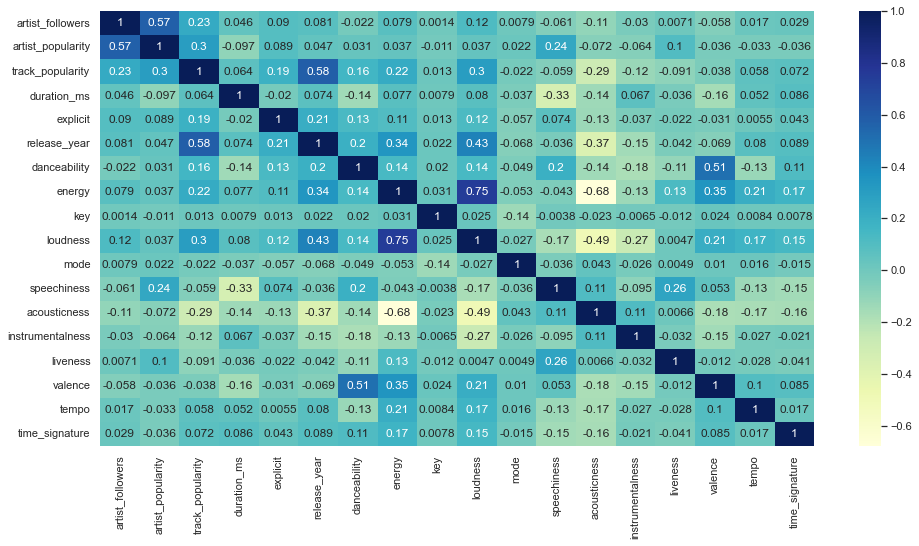

In [27]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = train.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

### Analysis: 
By looking at the heatmap, we can look more closely at the attributes that make a song more popular
- Release_year appears to have the highest correlation with track_popularity. This makes sense, given that newer songs are more likely to be listened to on spotify and thus gain popularity. 
    - popularity refers to the total number of plays that the track has had and how recent those plays are. On a scale of 0 to 100. According to the spotify, track popularity is most influenced right after a track has been released. 
https://lab.songstats.com/spotify-popularity-a-unique-insight-into-the-spotify-algorithm-and-how-to-influence-it-93bb63863ff0
- loudness, artist popularity, energy, artist_popularity, and loudness also seem to have a stronger relationship with track_popularity than the other variabls. However, the correlation of these variables with track_popularity still isn't very strong compared to release_year. 
- acousticness is the variable that is most strongly negatively correlated with track_popularity out of all of the variables. This means that as acousticness goes down, track popularity goes up. This makes sense since typically the acoustic versions of songs are released as an additional track, and don't tend to get as much attention. 

In [28]:
train.corrwith(train['track_popularity']).sort_values(ascending=False)

track_popularity     1.000000
release_year         0.576942
artist_popularity    0.299639
loudness             0.298486
artist_followers     0.227808
energy               0.220601
explicit             0.188473
danceability         0.158348
time_signature       0.072216
duration_ms          0.063703
tempo                0.057826
key                  0.013335
mode                -0.021769
valence             -0.037661
speechiness         -0.058812
liveness            -0.090723
instrumentalness    -0.122612
acousticness        -0.288464
dtype: float64

### Scatterplots between track_popularity and correlated variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


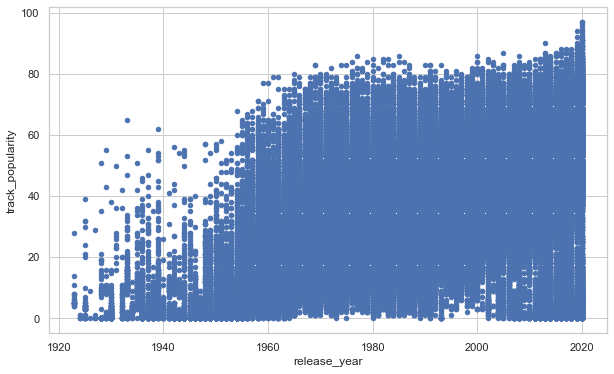

In [29]:
ax = train.plot(x = 'release_year', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'release_year', 
              ylabel = 'track_popularity')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


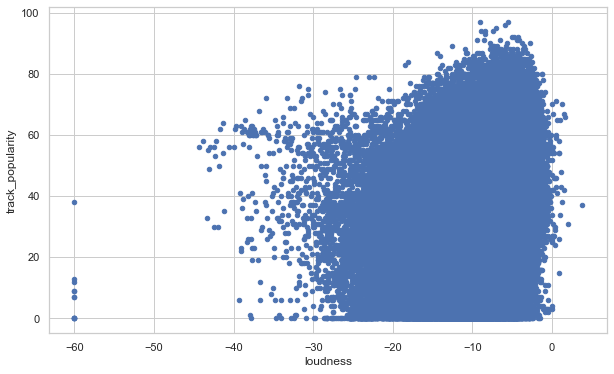

In [30]:
ax = train.plot(x = 'loudness', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'loudness', 
              ylabel = 'track_popularity')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


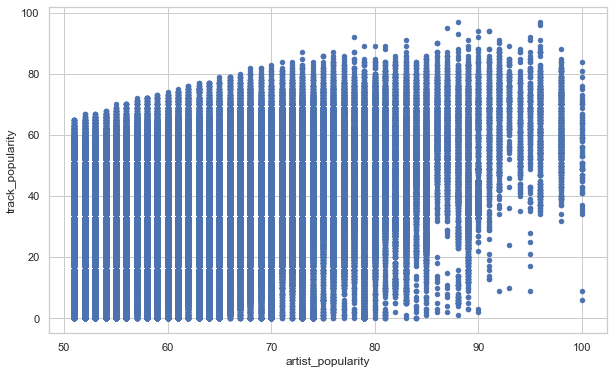

In [31]:
ax = train.plot(x = 'artist_popularity', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'artist_popularity', 
              ylabel = 'track_popularity')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


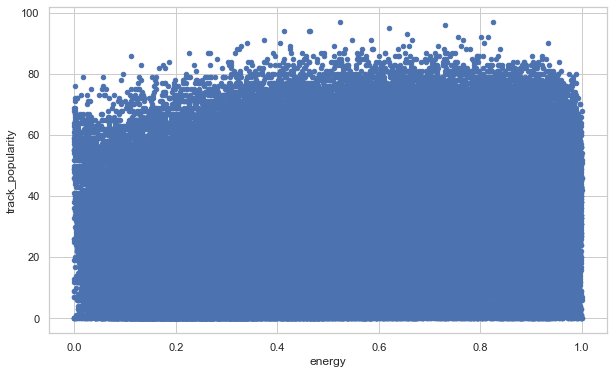

In [32]:
ax = train.plot(x = 'energy', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'energy', 
              ylabel = 'track_popularity')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


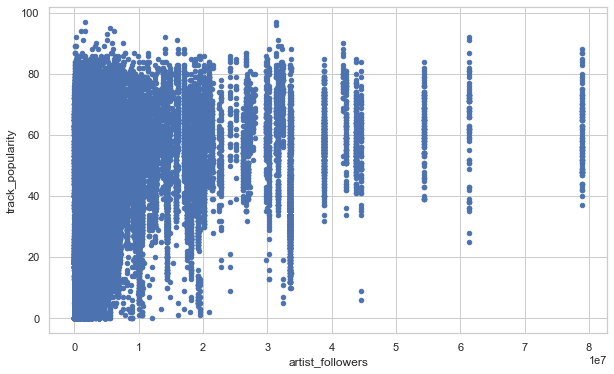

In [33]:
ax = train.plot(x = 'artist_followers', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'artist_followers', 
              ylabel = 'track_popularity')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


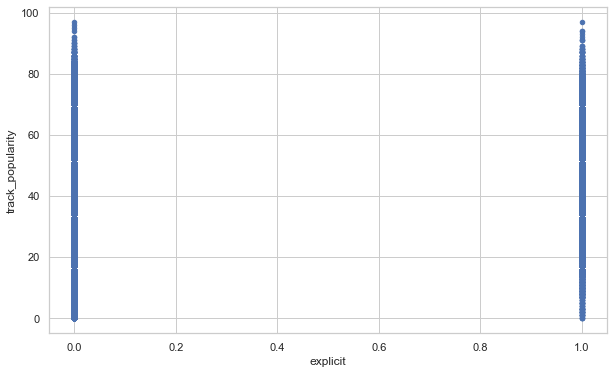

In [34]:
ax = train.plot(x = 'explicit', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'explicit', 
              ylabel = 'track_popularity')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


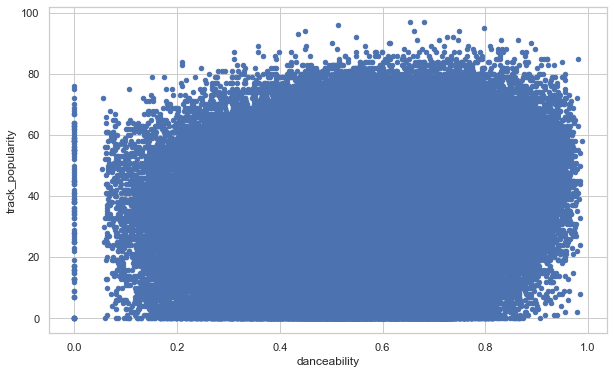

In [35]:
ax = train.plot(x = 'danceability', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'danceability', 
              ylabel = 'track_popularity')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


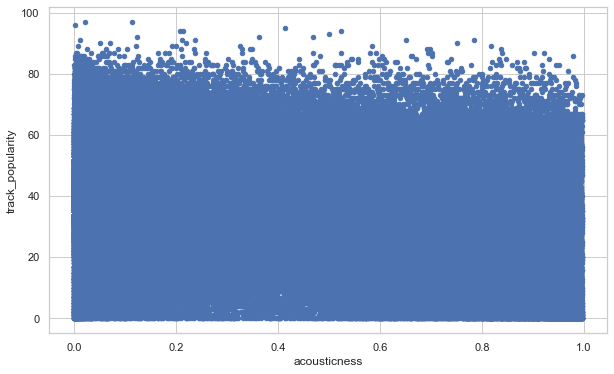

In [36]:
ax = train.plot(x = 'acousticness', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'acousticness', 
              ylabel = 'track_popularity')

## MLR Model

In [37]:
# goal is to predict the popularity of a song based on a variety of categorical and numeric variables
ols_object = smf.ols(formula = 'track_popularity~release_year+loudness+artist_popularity+energy+artist_followers+explicit+danceability+time_signature+duration_ms+tempo+key+mode+valence+speechiness+liveness+instrumentalness+acousticness', data = train)
model = ols_object.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                 1.083e+04
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:38:35   Log-Likelihood:            -9.4539e+05
No. Observations:              240719   AIC:                         1.891e+06
Df Residuals:                  240701   BIC:                         1.891e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -888.0526      3.344   -265.585      0.000    -894.606    -881.499
release_year          0.4487      0.002    270.465      0.000       0.445       0.452
loudness              0.1250      0.010     13.043      0.000       0.106       0.144
artist_popularity     0.4707      0.003    147.168      0.000       0.464       0.477
energy               -2.4503      0.213    -11.521      0.000      -2.867      -2.033
artist_followers   3.954e-09   6.58e-09      0.601      0.548   -8.94e-09    1.69e-08
explicit              3.5059      0.122     28.717      0.000       3.267       3.745
danceability          5.9260      0.208     28.442      0.000       5.518       6.334
time_signature        0.1686      0.057      2.982      0.003       0.058       0.279
duration_ms        3.387e-06   2.73e-07     12.424      0.000    2.85e-06    3.92e-06
tempo                 0.0068      0.001      7.737      0.000       0.005       0.009
key                   0.0136      0.007      1.904      0.057      -0.000       0.028
mode                  0.3795      0.054      6.987      0.000       0.273       0.486
valence              -1.5078      0.136    -11.067      0.000      -1.775      -1.241
speechiness          -7.3323      0.156    -46.875      0.000      -7.639      -7.026
liveness             -5.2434      0.136    -38.439      0.000      -5.511      -4.976
instrumentalness     -1.5645      0.128    -12.201      0.000      -1.816      -1.313
acousticness         -3.0547      0.112    -27.210      0.000      -3.275      -2.835
==============================================================================
Omnibus:                     7569.241   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20131.394
Skew:                          -0.079   Prob(JB):                         0.00
Kurtosis:                       4.408   Cond. No.                     6.90e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variable Significance 
- From the initial model, we can see that assuming a significance level of 0.05, artist_popularity is not significant because the p-value is 0.548.Thus, this variable needs to be removed from the next model.  

## Checking for Multicollinearity

In [38]:
# VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.
# creating a smaller dataset with just the continuous variables

#compute the Variance Inflation Factor (VIF) for the predictors
X = train[['release_year','loudness','artist_popularity','energy','artist_followers','explicit','danceability','time_signature','duration_ms','tempo','key','mode','valence','speechiness','liveness','instrumentalness','acousticness']]
X.columns[1:]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

              feature           VIF
0               const  17830.296226
1        release_year      1.477784
2            loudness      2.896234
3   artist_popularity      1.688885
4              energy      4.052986
5    artist_followers      1.595640
6            explicit      1.083420
7        danceability      1.753633
8      time_signature      1.073271
9         duration_ms      1.186214
10              tempo      1.114294
11                key      1.021297
12               mode      1.036711
13            valence      1.852460
14        speechiness      1.537075
15           liveness      1.169075
16   instrumentalness      1.155470
17       acousticness      2.076949


#### Analysis: 
We can see that almost all of the VIF values are close to 1 (excluding energy but that is still below 5), thus the multicollinearity is not a large problem for this dataset. 

## Variable Interactions

In [39]:
# genre is a qualitative predictor
# checking the distribution of values of genre
train.genres.value_counts()

pop              69216
rock             49702
pop & rock       43324
miscellaneous    35633
jazz             13331
hoerspiel        12483
hip hop           6952
folk              2819
latin             2124
metal             1655
rap               1473
country           1220
electronic         787
Name: genres, dtype: int64

## Model with Genre interaction terms

In [40]:
# predicting the popularity of a song based on a variety of categorical and numeric variables interacted with genres
ols_obj_genre = smf.ols(formula = 'track_popularity~release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+explicit*genres+danceability*genres+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = train)
model_1 = ols_obj_genre.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     948.8
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:39:05   Log-Likelihood:            -9.3879e+05
No. Observations:              240719   AIC:                         1.878e+06
Df Residuals:                  240499   BIC:                         1.880e+06
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -1337.4739     48.426    -27.619      0.000   -1432.388   -1242.560
genres[T.electronic]                       1212.3717    100.582     12.054      0.000    1015.233    1409.510
genres[T.folk]                              -26.6392     60.909     -0.437      0.662    -146.019      92.741
genres[T.hip hop]                           596.5054     61.038      9.773      0.000     476.872     716.139
genres[T.hoerspiel]                         975.5920     59.502     16.396      0.000     858.970    1092.214
genres[T.jazz]                              393.3188     50.466      7.794      0.000     294.407     492.230
genres[T.latin]                             300.2146     64.891      4.626      0.000     173.030     427.399
genres[T.metal]                             790.8439    102.731      7.698      0.000     589.493     992.194
genres[T.miscellaneous]                     273.2643     49.034      5.573      0.000     177.158     369.370
genres[T.pop]                               273.1704     48.891      5.587      0.000     177.344     368.996
genres[T.pop & rock]                        646.5294     49.198     13.141      0.000     550.103     742.956
genres[T.rap]                              -226.9159    121.859     -1.862      0.063    -465.757      11.925
genres[T.rock]                              726.2497     49.139     14.779      0.000     629.938     822.562
release_year                                  0.6857      0.024     28.739      0.000       0.639       0.732
release_year:genres[T.electronic]            -0.6170      0.050    -12.272      0.000      -0.716      -0.518
release_year:genres[T.folk]                   0.0015      0.030      0.050      0.960      -0.058       0.061
release_year:genres[T.hip hop]               -0.3100      0.030    -10.333      0.000      -0.369      -0.251
release_year:genres[T.hoerspiel]             -0.5047      0.030    -16.949      0.000      -0.563      -0.446
release_year:genres[T.jazz]                  -0.1965      0.025     -7.894      0.000      -0.245      -0.148
release_year:genres[T.latin]                 -0.1567      0.032     -4.838      0.000      -0.220      -0.093
release_year:genres[T.metal]                 -0.4102      0.051     -8.023      0.000      -0.510      -0.310
release_year:genres[T.miscellaneous]         -0.1448      0.024     -5.991      0.000      -0.192      -0.097
release_year:genres[T.pop]                   -0.1485      0.024     -6.164      0.000      -0.196      -0.101
release_year:genres[T.pop & rock]            -0.3400      0.024    -14.022      0.000      -0.388      -0.292
release_year:genres[T.rap]                    0.1052      0.060      1.749      0.080      -0.013       0.223
rel

## Transformations

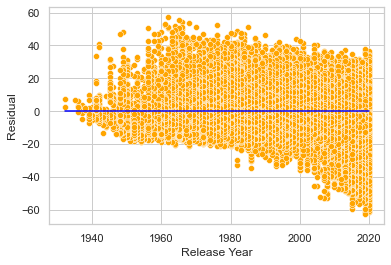

In [41]:
temp_data = train.drop(index = train[train['genres'] != 'pop'].index.to_list(), axis = 1)

sns.scatterplot(x = temp_data['release_year'], y = model_1.resid, color='orange')
sns.lineplot(x = [temp_data['release_year'].min(),temp_data['release_year'].max()],y = [0,0],color = 'blue')
plt.xlabel('Release Year')
plt.ylabel('Residual')
plt.show()

In [42]:
train['log_release_year'] = train['release_year'].apply(lambda x:np.log(x))

ols_object8 = smf.ols(formula = 'track_popularity~release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+explicit*genres+danceability*genres+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = train)
model8 = ols_object8.fit()
model8.summary()

/var/folders/48/mq70gn7j58x5yxfsrc0844wr0000gn/T/ipykernel_6900/70690812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_release_year'] = train['release_year'].apply(lambda x:np.log(x))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     948.8
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:40:52   Log-Likelihood:            -9.3879e+05
No. Observations:              240719   AIC:                         1.878e+06
Df Residuals:                  240499   BIC:                         1.880e+06
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -1337.4739     48.426    -27.619      0.000   -1432.388   -1242.560
genres[T.electronic]                       1212.3717    100.582     12.054      0.000    1015.233    1409.510
genres[T.folk]                              -26.6392     60.909     -0.437      0.662    -146.019      92.741
genres[T.hip hop]                           596.5054     61.038      9.773      0.000     476.872     716.139
genres[T.hoerspiel]                         975.5920     59.502     16.396      0.000     858.970    1092.214
genres[T.jazz]                              393.3188     50.466      7.794      0.000     294.407     492.230
genres[T.latin]                             300.2146     64.891      4.626      0.000     173.030     427.399
genres[T.metal]                             790.8439    102.731      7.698      0.000     589.493     992.194
genres[T.miscellaneous]                     273.2643     49.034      5.573      0.000     177.158     369.370
genres[T.pop]                               273.1704     48.891      5.587      0.000     177.344     368.996
genres[T.pop & rock]                        646.5294     49.198     13.141      0.000     550.103     742.956
genres[T.rap]                              -226.9159    121.859     -1.862      0.063    -465.757      11.925
genres[T.rock]                              726.2497     49.139     14.779      0.000     629.938     822.562
release_year                                  0.6857      0.024     28.739      0.000       0.639       0.732
release_year:genres[T.electronic]            -0.6170      0.050    -12.272      0.000      -0.716      -0.518
release_year:genres[T.folk]                   0.0015      0.030      0.050      0.960      -0.058       0.061
release_year:genres[T.hip hop]               -0.3100      0.030    -10.333      0.000      -0.369      -0.251
release_year:genres[T.hoerspiel]             -0.5047      0.030    -16.949      0.000      -0.563      -0.446
release_year:genres[T.jazz]                  -0.1965      0.025     -7.894      0.000      -0.245      -0.148
release_year:genres[T.latin]                 -0.1567      0.032     -4.838      0.000      -0.220      -0.093
release_year:genres[T.metal]                 -0.4102      0.051     -8.023      0.000      -0.510      -0.310
release_year:genres[T.miscellaneous]         -0.1448      0.024     -5.991      0.000      -0.192      -0.097
release_year:genres[T.pop]                   -0.1485      0.024     -6.164      0.000      -0.196      -0.101
release_year:genres[T.pop & rock]            -0.3400      0.024    -14.022      0.000      -0.388      -0.292
release_year:genres[T.rap]                    0.1052      0.060      1.749      0.080      -0.013       0.223
rel

In [15]:
# From model 1, we see that the R^2 value went up to 0.446 when the interaction terms with genre were added
# now let's try adding some terms with transformations 
ols_obj2 = smf.ols(formula = 'track_popularity~(release_year*genres+loudness*genres+artist_popularity*genres+energy*genres)**2+explicit*genres+danceability*genres+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = train)
model_2 = ols_obj2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     722.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:26:48   Log-Likelihood:            -9.3700e+05
No. Observations:              240719   AIC:                         1.875e+06
Df Residuals:                  240421   BIC:                         1.878e+06
Df Model:                         297                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                               -993.1865    391.954     -2.534      0.011   -1761.406    -224.967
genres[T.electronic]                                     375.8824    917.930      0.409      0.682   -1423.237    2175.001
genres[T.folk]                                          1455.7231    555.335      2.621      0.009     367.281    2544.165
genres[T.hip hop]                                        965.3197    528.912      1.825      0.068     -71.334    2001.973
genres[T.hoerspiel]                                    -1710.3151    483.975     -3.534      0.000   -2658.894    -761.737
genres[T.jazz]                                          -144.3182    415.540     -0.347      0.728    -958.765     670.129
genres[T.latin]                                         1300.3585    543.669      2.392      0.017     234.781    2365.935
genres[T.metal]                                        -1184.6430   1144.363     -1.035      0.301   -3427.564    1058.278
genres[T.miscellaneous]                                 -172.6221    397.797     -0.434      0.664    -952.293     607.049
genres[T.pop]                                           -717.9260    396.286     -1.812      0.070   -1494.636      58.784
genres[T.pop & rock]                                     736.2021    401.420      1.834      0.067     -50.571    1522.975
genres[T.rap]                                          -2368.2346   1102.578     -2.148      0.032   -4529.259    -207.210
genres[T.rock]                                          -798.3512    397.928     -2.006      0.045   -1578.279     -18.423
release_year                                               0.4868      0.196      2.482      0.013       0.102       0.871
release_year:genres[T.electronic]                         -0.1423      0.461     -0.309      0.757      -1.045       0.760
release_year:genres[T.folk]                               -0.6971      0.278     -2.510      0.012      -1.241      -0.153
release_year:genres[T.hip hop]                            -0.4662      0.264     -1.767      0.077      -0.983       0.051
release_year:genres[T.hoerspiel]                           0.8656      0.243      3.556      0.000       0.389       1.343
release_year:genres[T.jazz]                                0.1068      0.208      0.513      0.608      -0.302       0.515
release_year:genres[T.latin]                              -0.6321      0.273     -2.319      0.020      -1.166      -0.098
release_year:genres[T.metal]                               0.6279      0.574      1.094      0.274      -0.497       1.753
release_year:genres[T.miscellaneous]                       0.1012      0.199      0.508      0.611      -0.289       0.491
release_

#### Analysis:
R^2 value increased again

In [16]:
# From model 1, we see that the R^2 value went up to 0.446 when the interaction terms with genre were added
# now let's try adding some terms with transformations 
ols_obj3 = smf.ols(formula = 'track_popularity~(release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+explicit*genres+danceability*genres)**2+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = train)
model_3 = ols_obj3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     533.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:27:56   Log-Likelihood:            -9.3641e+05
No. Observations:              240719   AIC:                         1.874e+06
Df Residuals:                  240312   BIC:                         1.878e+06
Df Model:                         406                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                              -1038.6642    430.636     -2.412      0.016   -1882.700    -194.628
genres[T.electronic]                                     418.3609    964.139      0.434      0.664   -1471.326    2308.048
genres[T.folk]                                          1483.2824    585.547      2.533      0.011     335.626    2630.939
genres[T.hip hop]                                        770.8719    587.174      1.313      0.189    -379.973    1921.717
genres[T.hoerspiel]                                    -1904.7315    585.453     -3.253      0.001   -3052.204    -757.259
genres[T.jazz]                                          -330.0527    457.832     -0.721      0.471   -1227.391     567.285
genres[T.latin]                                         1096.3811    595.119      1.842      0.065     -70.036    2262.798
genres[T.metal]                                         -180.2455   1189.335     -0.152      0.880   -2511.312    2150.821
genres[T.miscellaneous]                                 -243.6091    436.846     -0.558      0.577   -1099.816     612.598
genres[T.pop]                                           -522.6294    435.124     -1.201      0.230   -1375.460     330.202
genres[T.pop & rock]                                     715.5756    440.085      1.626      0.104    -146.979    1578.130
genres[T.rap]                                          -2155.4015   1305.107     -1.652      0.099   -4713.376     402.573
genres[T.rock]                                          -372.5898    437.829     -0.851      0.395   -1230.723     485.543
release_year                                               0.5077      0.215      2.365      0.018       0.087       0.929
release_year:genres[T.electronic]                         -0.1612      0.485     -0.332      0.740      -1.111       0.789
release_year:genres[T.folk]                               -0.7033      0.292     -2.406      0.016      -1.276      -0.130
release_year:genres[T.hip hop]                            -0.3665      0.292     -1.256      0.209      -0.939       0.206
release_year:genres[T.hoerspiel]                           0.9720      0.294      3.306      0.001       0.396       1.548
release_year:genres[T.jazz]                                0.2060      0.229      0.899      0.368      -0.243       0.655
release_year:genres[T.latin]                              -0.5215      0.298     -1.749      0.080      -1.106       0.063
release_year:genres[T.metal]                               0.1221      0.597      0.205      0.838      -1.047       1.291
release_year:genres[T.miscellaneous]                       0.1376      0.218      0.632      0.528      -0.289       0.565
release_

In [17]:
# applying a quadratic transformation on the interaction terms with the continuous variables 
# that are most strongly correlated with the response, track_popularity
ols_obj4 = smf.ols(formula = 'track_popularity~(release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+explicit*genres+danceability*genres+time_signature*genres)**2+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = train)
model_4 = ols_obj4.fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     453.7
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:28:49   Log-Likelihood:            -9.3632e+05
No. Observations:              240719   AIC:                         1.874e+06
Df Residuals:                  240240   BIC:                         1.879e+06
Df Model:                         478                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                -1145.6416    605.537     -1.892      0.058   -2332.479      41.196
genres[T.electronic]                                      2107.3636   1445.147      1.458      0.145    -725.088    4939.815
genres[T.folk]                                            1807.1741    737.401      2.451      0.014     361.888    3252.460
genres[T.hip hop]                                          132.2339    899.704      0.147      0.883   -1631.161    1895.629
genres[T.hoerspiel]                                      -1719.4581    731.817     -2.350      0.019   -3153.800    -285.116
genres[T.jazz]                                            -449.4655    635.810     -0.707      0.480   -1695.637     796.706
genres[T.latin]                                           1261.1209    792.343      1.592      0.111    -291.851    2814.092
genres[T.metal]                                           -180.3966   1603.267     -0.113      0.910   -3322.757    2961.964
genres[T.miscellaneous]                                   -246.0447    611.366     -0.402      0.687   -1444.305     952.216
genres[T.pop]                                             -440.2193    610.393     -0.721      0.471   -1636.574     756.135
genres[T.pop & rock]                                       770.1113    616.325      1.250      0.211    -437.870    1978.093
genres[T.rap]                                             -827.0639   3026.665     -0.273      0.785   -6759.248    5105.120
genres[T.rock]                                            -325.6688    614.299     -0.530      0.596   -1529.680     878.342
release_year                                                 0.5513      0.297      1.857      0.063      -0.031       1.133
release_year:genres[T.electronic]                           -1.0435      0.743     -1.404      0.160      -2.500       0.413
release_year:genres[T.folk]                                 -0.8670      0.364     -2.381      0.017      -1.581      -0.153
release_year:genres[T.hip hop]                              -0.0413      0.443     -0.093      0.926      -0.910       0.827
release_year:genres[T.hoerspiel]                             0.8879      0.363      2.448      0.014       0.177       1.599
release_year:genres[T.jazz]                                  0.2744      0.313      0.877      0.381      -0.339       0.888
release_year:genres[T.latin]                                -0.6020      0.396     -1.520      0.129      -1.378       0.174
release_year:genres[T.metal]                                 0.1481      0.800      0.185      0.853      -1.420       1.716
release_year:genres[T.miscellaneous]                         0.1497      0.300     

### Analysis
We can see from model 4 yields the highest R^2 value of 0.474

## Creating the Test Dataset

In [18]:
# filtering the original dataset for only songs released in 2021
test = spotify_data[spotify_data['release_year']==2021]
test

,artist_followers,genres,artist_name,artist_popularity,track_name,track_popularity,duration_ms,explicit,release_year,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,16996777,rap,Juice WRLD,96,All Girls Are The Same,0,165820,1,2021,0.673,...,0,-7.226,1,0.3060,0.0769,0.000338,0.0856,0.203,161.991,4
1,16996777,rap,Juice WRLD,96,Lucid Dreams,0,239836,1,2021,0.511,...,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,0.218,83.903,4
2,16996777,rap,Juice WRLD,96,Hear Me Calling,0,189977,1,2021,0.699,...,7,-3.997,0,0.1060,0.3080,0.000036,0.1210,0.499,88.933,4
3,16996777,rap,Juice WRLD,96,Robbery,0,240527,1,2021,0.708,...,2,-5.181,1,0.0442,0.3480,0.000000,0.2220,0.543,79.993,4
4,5988689,rap,Roddy Ricch,88,Big Stepper,0,175170,0,2021,0.753,...,8,-8.469,1,0.2920,0.0477,0.000000,0.1970,0.616,76.997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,300653,miscellaneous,Burning Spear,53,2000 Years,0,242960,0,2021,0.830,...,1,-11.238,1,0.0736,0.3740,0.874000,0.0633,0.751,74.789,4
2467,10903,jazz,Coffee Shop Jazz Relax,55,Incredible New Years Resolutions,6,129010,0,2021,0.805,...,10,-20.928,1,0.0867,0.9910,0.921000,0.0899,0.104,100.612,3
2468,10903,jazz,Coffee Shop Jazz Relax,55,Friendly Jazz Piano Solo - Vibe for New Years ...,6,108019,0,2021,0.783,...,0,-19.725,1,0.0860,0.9870,0.883000,0.0656,0.141,79.981,4
2469,13616,hip hop,167 Gang,53,Dalle popolari,59,155172,1,2021,0.775,...,1,-7.898,0,0.2340,0.3490,0.000000,0.2980,0.373,115.977,4


## Completing the Predictions

In [19]:
#Using the predict() function associated with the 'model' object to make predictions of track_popularity on test (unknown) data
pred_pop = model_4.predict(test)

### Visualization that compares the predicted car prices with the actual car prices

Text(0, 0.5, 'Predicted track popularity')

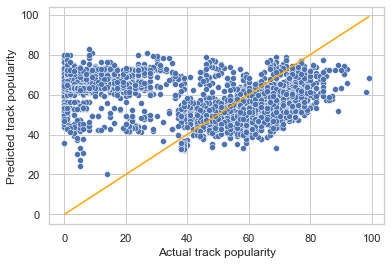

In [20]:
sns.scatterplot(x = test.track_popularity, y = pred_pop)
#In case of a perfect prediction, all the points must lie on the line x = y.
sns.lineplot(x = [0,test.track_popularity.max()], y = [0,test.track_popularity.max()],color='orange') #Plotting the line x = y.
plt.xlabel('Actual track popularity')
plt.ylabel('Predicted track popularity')

### RMSE of predicted track popularity

In [21]:
np.sqrt(((test.track_popularity - pred_pop)**2).mean())

33.999678836048105

### Residual Standard Error based on training data

In [22]:
np.sqrt(model_4.mse_resid)

11.843229883467188

### Forward stepwise selection

## Ridge Regression

### Standardizing the predictors

In [27]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [28]:
#Standardizing predictors so that each of them have zero mean and unit variance

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

#### Optimizing the tuning parameter

In [29]:
#Creating a range of values of the tuning parameter to visualize the ridge regression coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,200)*0.5

In [30]:
#Finding the ridge regression coefficients for increasing values of the tuning parameter
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

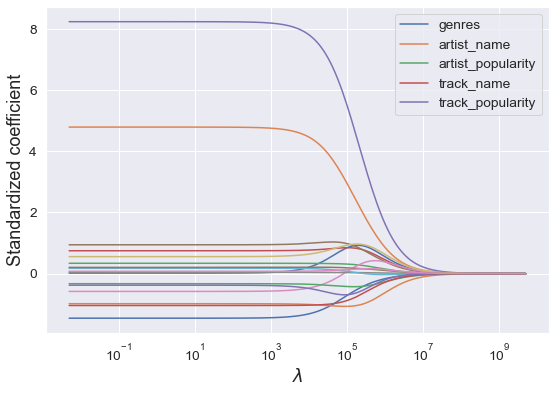

In [31]:
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);

In [32]:
#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
ridgecv.alpha_

15.811388300841896

Text(0, 0.5, 'Cross-validation error')

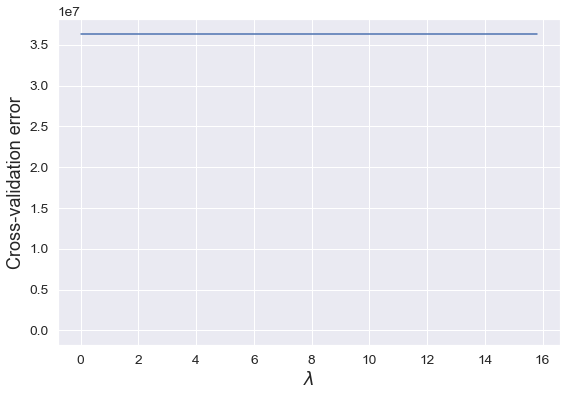

In [33]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[0,3.5],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

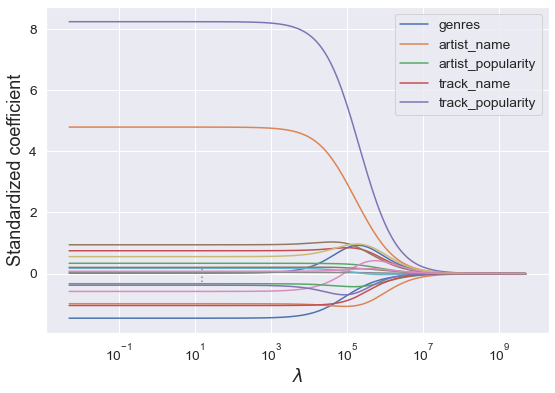

In [34]:
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,200)*0.5
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[-0.4,0.2],':')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);

#### RMSE on test data

In [35]:
#Test dataset
Xtest = test.drop(['genres', 'artist_name', 'track_name', 'track_popularity'], axis=1)

#Standardizing test data
Xtest_std = scaler.transform(Xtest)

#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

#RMSE on test data
np.sqrt(((test.track_popularity - pred)**2).mean())

32.621661572458876

#### model coefficients and R-squared

In [36]:
ridge.coef_

array([ 0.01935139,  4.78871534,  0.33884037,  0.74854525,  8.23255034,
        0.94326071, -0.58062174,  0.04817959,  0.55600577,  0.17811929,
       -1.45502067, -0.98202118, -0.32846257, -1.04073875, -0.37738731,
        0.2045314 ,  0.07737407])

In [37]:
#R-squared on train data for the ridge regression model
r2_score(ridge.predict(Xstd),y)

-0.30806202306306973

In [38]:
#R-squared on test data for the ridge regression model
r2_score(pred,test.track_popularity)

-17.022016866737356

### Lasso 

### Optimizing the tuning parameter λ

In [39]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

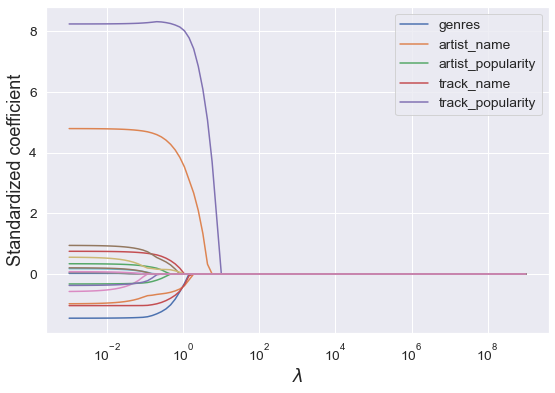

In [40]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
plt.legend(train.columns[1:6]);

In [41]:
#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

5e-06

Text(0, 0.5, 'Cross-validation error')

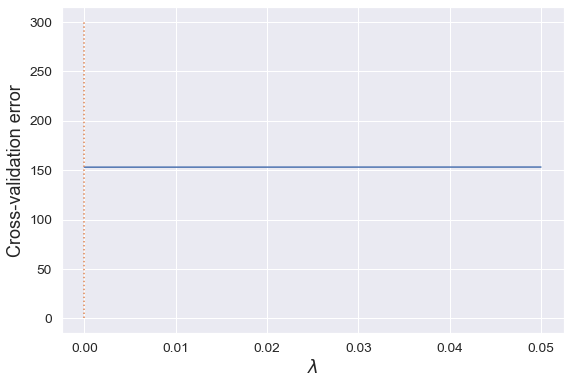

In [42]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0,300],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

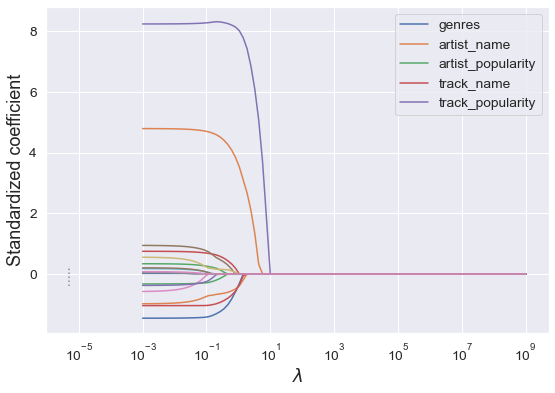

In [43]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);
plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
plt.legend(train.columns[1:6]);

#### RMSE on test data

In [44]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

#RMSE on test data
np.sqrt(((test.track_popularity - pred)**2).mean())

32.62193653280518

## Best Subsets Selection

In [ ]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['','number_convenience_stores','latitude', 'longitude','distance_MRT']]